### Web Scraping

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url='https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory'

In [3]:
page=requests.get(url)
soup= BeautifulSoup(page.text,'html')
#print(soup)

In [6]:
soup.find_all('table')[15]

<table class="wikitable sortable mw-datatable sort-under plainrowheaders sticky-table-row1 sticky-table-col1" style="text-align:right;">
<caption><style data-mw-deduplicate="TemplateStyles:r1152813436">.mw-parser-output .sr-only{border:0;clip:rect(0,0,0,0);clip-path:polygon(0px 0px,0px 0px,0px 0px);height:1px;margin:-1px;overflow:hidden;padding:0;position:absolute;width:1px;white-space:nowrap}</style><span class="sr-only">COVID-19 cases and deaths by region, in absolute figures and rates per million inhabitants as of 25 December 2022</span>
</caption>
<tbody><tr>
<th scope="col">Region<sup class="reference" id="cite_ref-38"><a href="#cite_note-38"><span class="cite-bracket">[</span>30<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Total cases
</th>
<th scope="col">Total deaths
</th>
<th scope="col">Cases per million
</th>
<th scope="col">Deaths per million
</th>
<th scope="col">Current weekly cases
</th>
<th scope="col">Current weekly deaths
</th>
<th scope="col">Po

In [8]:
table=soup.find_all('table')[15]

In [11]:
world_title=table.find_all('th')[1:9]
world_title

[<th scope="col">Total cases
 </th>,
 <th scope="col">Total deaths
 </th>,
 <th scope="col">Cases per million
 </th>,
 <th scope="col">Deaths per million
 </th>,
 <th scope="col">Current weekly cases
 </th>,
 <th scope="col">Current weekly deaths
 </th>,
 <th scope="col">Population millions
 </th>,
 <th scope="col">Vacci­nated %<sup class="reference" id="cite_ref-39"><a href="#cite_note-39"><span class="cite-bracket">[</span>31<span class="cite-bracket">]</span></a></sup>
 </th>]

In [13]:
table_title = [title.text.strip() for title in world_title]
print(table_title)

['Total cases', 'Total deaths', 'Cases per million', 'Deaths per million', 'Current weekly cases', 'Current weekly deaths', 'Population millions', 'Vacci\xadnated\xa0%[31]']


In [15]:
import pandas as pd

df=pd.DataFrame(columns=table_title)
df=df.rename(columns={'Vacci\xadnated\xa0%[31]':'Vaccinated %'})

df

,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %


In [17]:
column_data=table.find_all('tr')

In [19]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data

df

,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %
0,"179,537,758","1,185,108","401,363","2,649","886,074","3,985",447,75.1
1,"103,783,777","1,133,607","281,404","3,074","476,376","2,975",369,76.1
2,"57,721,948","498,259","247,054","2,133","74,354",248,234,61.2
3,"65,835,789","1,313,061","153,151","3,055","378,622","1,252",430,81.7
4,"25,646,533","434,988","108,307","1,837","49,022",393,237,55.9
5,"11,338,600","380,660","63,108","2,119","60,268",263,180,69.0
6,"22,549,784","238,106","86,400",912,"13,457",65,261,51.9
7,"60,806,544","318,455","105,317",552,"1,390,401","2,777",577,72.1
8,"2,605,473","26,237","60,179",606,737,25,43,46.4
9,"50,347,136","620,218","27,121",334,"1,911",24,"1,856",69.4


In [21]:
first_column_data=table.find_all('th')[9:]
first_column_data

[<th scope="row"><a href="/wiki/European_Union_response_to_the_COVID-19_pandemic" title="European Union response to the COVID-19 pandemic">European Union</a>
 </th>,
 <th scope="row"><a href="/wiki/COVID-19_pandemic_in_North_America" title="COVID-19 pandemic in North America">North America</a>
 </th>,
 <th scope="row">Other <a href="/wiki/COVID-19_pandemic_in_Europe" title="COVID-19 pandemic in Europe">Europe</a>
 </th>,
 <th scope="row"><a href="/wiki/COVID-19_pandemic_in_South_America" title="COVID-19 pandemic in South America">South America</a>
 </th>,
 <th scope="row"><a href="/wiki/COVID-19_pandemic_in_Russia" title="COVID-19 pandemic in Russia">Russia</a> and Central Asia
 </th>,
 <th scope="row">Central America
 </th>,
 <th scope="row">Middle East
 </th>,
 <th scope="row"><a href="/wiki/COVID-19_pandemic_in_Oceania" title="COVID-19 pandemic in Oceania">Oceania</a> and islands in East Asia
 </th>,
 <th scope="row">Caribbean
 </th>,
 <th scope="row"><a href="/wiki/COVID-19_pandemi

In [23]:
first_table_column = [title.text.strip() for title in first_column_data]
print(first_table_column)

['European Union', 'North America', 'Other Europe', 'South America', 'Russia and Central Asia', 'Central America', 'Middle East', 'Oceania and islands in East Asia', 'Caribbean', 'South Asia', 'North Africa', 'East Asia', 'Sub-Saharan Africa', 'Totals (or average)']


In [25]:
df.insert(0, 'Region', first_table_column)
df

,Region,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %
0,European Union,"179,537,758","1,185,108","401,363","2,649","886,074","3,985",447,75.1
1,North America,"103,783,777","1,133,607","281,404","3,074","476,376","2,975",369,76.1
2,Other Europe,"57,721,948","498,259","247,054","2,133","74,354",248,234,61.2
3,South America,"65,835,789","1,313,061","153,151","3,055","378,622","1,252",430,81.7
4,Russia and Central Asia,"25,646,533","434,988","108,307","1,837","49,022",393,237,55.9
5,Central America,"11,338,600","380,660","63,108","2,119","60,268",263,180,69.0
6,Middle East,"22,549,784","238,106","86,400",912,"13,457",65,261,51.9
7,Oceania and islands in East Asia,"60,806,544","318,455","105,317",552,"1,390,401","2,777",577,72.1
8,Caribbean,"2,605,473","26,237","60,179",606,737,25,43,46.4
9,South Asia,"50,347,136","620,218","27,121",334,"1,911",24,"1,856",69.4


In [27]:
df=df.drop(df.index[-1])
df

,Region,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %
0,European Union,"179,537,758","1,185,108","401,363","2,649","886,074","3,985",447,75.1
1,North America,"103,783,777","1,133,607","281,404","3,074","476,376","2,975",369,76.1
2,Other Europe,"57,721,948","498,259","247,054","2,133","74,354",248,234,61.2
3,South America,"65,835,789","1,313,061","153,151","3,055","378,622","1,252",430,81.7
4,Russia and Central Asia,"25,646,533","434,988","108,307","1,837","49,022",393,237,55.9
5,Central America,"11,338,600","380,660","63,108","2,119","60,268",263,180,69.0
6,Middle East,"22,549,784","238,106","86,400",912,"13,457",65,261,51.9
7,Oceania and islands in East Asia,"60,806,544","318,455","105,317",552,"1,390,401","2,777",577,72.1
8,Caribbean,"2,605,473","26,237","60,179",606,737,25,43,46.4
9,South Asia,"50,347,136","620,218","27,121",334,"1,911",24,"1,856",69.4


In [42]:
# export to csv file
# df.to_csv(r'...',index = False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Region                 13 non-null     object
 1   Total cases            13 non-null     object
 2   Total deaths           13 non-null     object
 3   Cases per million      13 non-null     object
 4   Deaths per million     13 non-null     object
 5   Current weekly cases   13 non-null     object
 6   Current weekly deaths  13 non-null     object
 7   Population millions    13 non-null     object
 8   Vaccinated %           13 non-null     object
dtypes: object(9)
memory usage: 1.0+ KB


In [31]:
df['Total cases']=df['Total cases'].str.replace(',','')
df['Total deaths']=df['Total deaths'].str.replace(',','')
df['Cases per million']=df['Cases per million'].str.replace(',','')
df['Deaths per million']=df['Deaths per million'].str.replace(',','')
df['Current weekly cases']=df['Current weekly cases'].str.replace(',','')
df['Current weekly deaths']=df['Current weekly deaths'].str.replace(',','')
df['Population millions']=df['Population millions'].str.replace(',','')

In [33]:
int_cols=list(df.columns[1:])

df[int_cols]= df[int_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 13 non-null     object 
 1   Total cases            13 non-null     int64  
 2   Total deaths           13 non-null     int64  
 3   Cases per million      13 non-null     int64  
 4   Deaths per million     13 non-null     int64  
 5   Current weekly cases   13 non-null     int64  
 6   Current weekly deaths  13 non-null     int64  
 7   Population millions    13 non-null     int64  
 8   Vaccinated %           13 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ KB


In [35]:
df

,Region,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %
0,European Union,179537758,1185108,401363,2649,886074,3985,447,75.1
1,North America,103783777,1133607,281404,3074,476376,2975,369,76.1
2,Other Europe,57721948,498259,247054,2133,74354,248,234,61.2
3,South America,65835789,1313061,153151,3055,378622,1252,430,81.7
4,Russia and Central Asia,25646533,434988,108307,1837,49022,393,237,55.9
5,Central America,11338600,380660,63108,2119,60268,263,180,69.0
6,Middle East,22549784,238106,86400,912,13457,65,261,51.9
7,Oceania and islands in East Asia,60806544,318455,105317,552,1390401,2777,577,72.1
8,Caribbean,2605473,26237,60179,606,737,25,43,46.4
9,South Asia,50347136,620218,27121,334,1911,24,1856,69.4


In [37]:
df.describe()

,Total cases,Total deaths,Cases per million,Deaths per million,Current weekly cases,Current weekly deaths,Population millions,Vaccinated %
count,1.300000e+01,1.300000e+01,13.000000,13.000000,1.300000e+01,13.000000,13.000000,13.000000
mean,5.003115e+07,5.073376e+05,122446.153846,1380.230769,3.063792e+05,989.230769,596.846154,62.684615
std,4.924562e+07,4.345907e+05,119000.956116,1128.037245,4.373195e+05,1361.648520,605.606011,17.292332
min,2.605473e+06,2.623700e+04,7598.000000,106.000000,6.680000e+02,8.000000,43.000000,27.600000
25%,1.133860e+07,1.899100e+05,32416.000000,414.000000,6.960000e+03,27.000000,234.000000,51.900000
50%,5.034714e+07,3.806600e+05,86400.000000,912.000000,6.026800e+04,263.000000,369.000000,69.000000
75%,6.080654e+07,6.202180e+05,153151.000000,2133.000000,4.763760e+05,1252.000000,577.000000,75.100000
max,1.795378e+08,1.313061e+06,401363.000000,3074.000000,1.390401e+06,3985.000000,1856.000000,87.200000


### VISUALIZATION

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

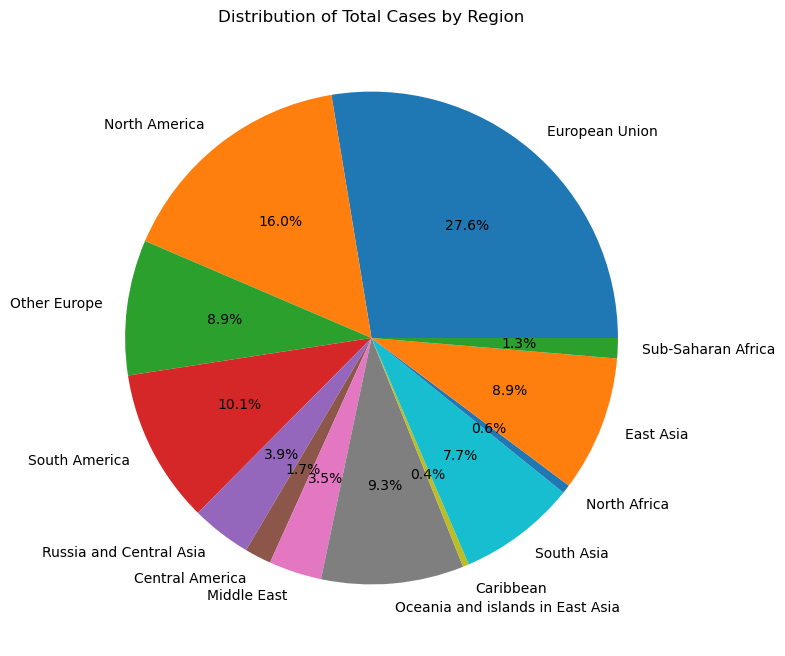

In [40]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Total Cases by Region')
plt.pie(x=df['Total cases'], labels = df['Region'], autopct='%1.1f%%')
plt.show()

(0.0, 1400000.0)

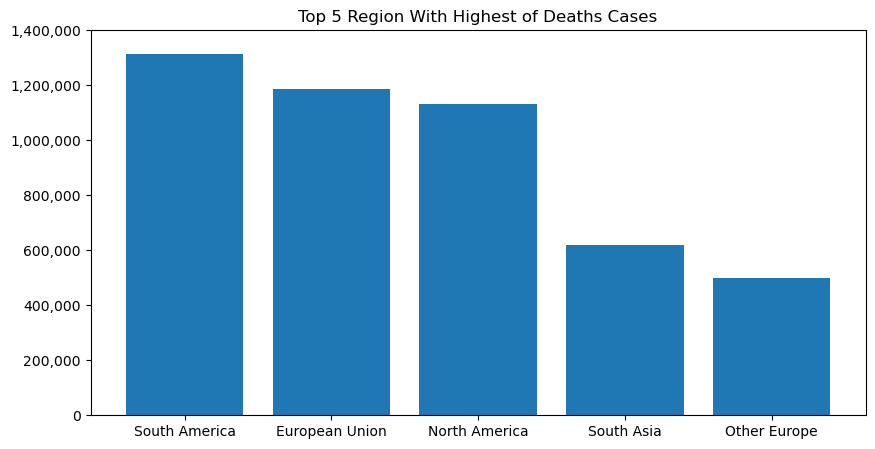

In [43]:
top5_region=df.sort_values(by='Total deaths', ascending=False)
df_5_deaths=top5_region.head(5)

plt.figure(figsize=(10,5))
plt.title('Top 5 Region With Highest of Deaths Cases')
plt.bar(x=df_5_deaths['Region'], height=df_5_deaths['Total deaths'])

def y_axis_formatter(x, pos):
  return "{:,}".format(int(x))
    
plt.gca().yaxis.set_major_formatter(y_axis_formatter)
plt.ylim(0, 1400000)

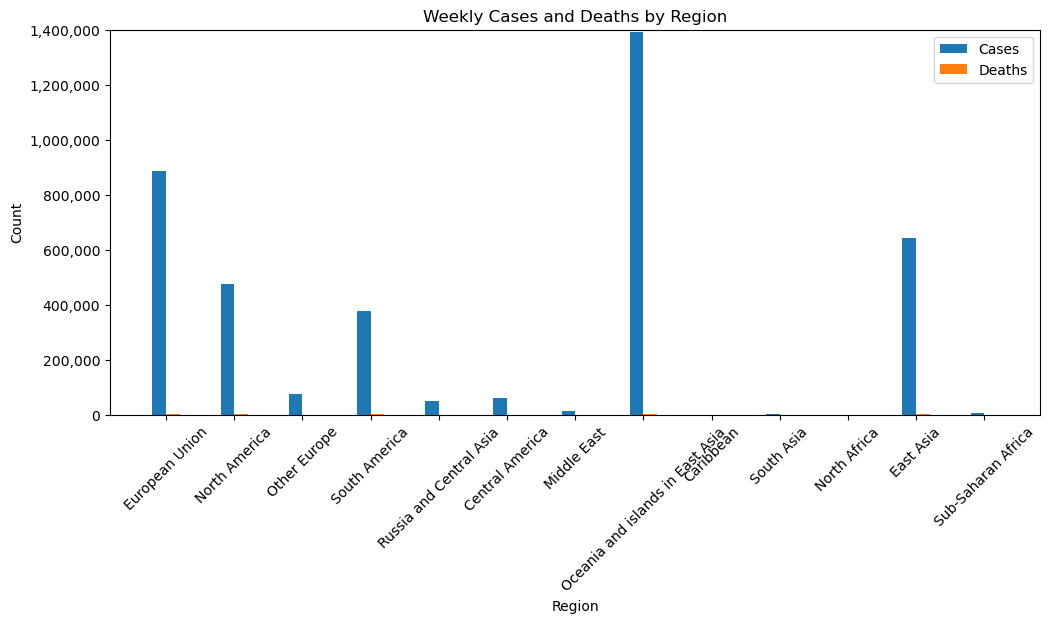

In [45]:
import numpy as np

x_pos= np.arange(len(df['Region']))
bar_width=0.2

plt.figure(figsize=(12,5))
plt.bar(x_pos, df['Current weekly cases'], label='Cases', width=bar_width)
plt.bar(x_pos+bar_width, df['Current weekly deaths'], label='Deaths', width=bar_width)

plt.xticks([p + bar_width/2 for p in x_pos], df['Region'])
plt.xticks(rotation=45)

def y_axis_formatter(x, pos):
  return "{:,}".format(int(x))
plt.gca().yaxis.set_major_formatter(y_axis_formatter)
plt.ylim(0, 1400000)

plt.title('Weekly Cases and Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend()
plt.show()

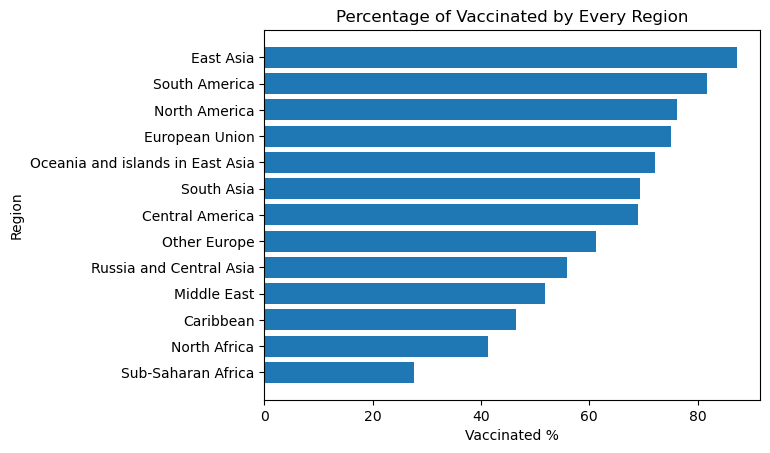

In [49]:
most_vaccinated_region = df.sort_values(by='Vaccinated %', ascending = True)

plt.barh(most_vaccinated_region['Region'], most_vaccinated_region['Vaccinated %'])

plt.title('Percentage of Vaccinated by Every Region')
plt.xlabel('Vaccinated %')
plt.ylabel('Region')
plt.show()